In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = './Dataset/DUMD/'
activity_folders = os.listdir(dataset_path)
print(activity_folders)

data_frame = pd.DataFrame()
df_list = []

for i in range(len(activity_folders)):
    activity_folder = activity_folders[i]
    print(activity_folder)
    
    person_folder_path = dataset_path + activity_folder + '/'
    person_folders = os.listdir(person_folder_path)
    
    for j in range(len(person_folders)):
        person_folder = person_folders[j]
        #print(person_folder)
        
        csv_file_path = dataset_path + activity_folder + '/' + person_folder + '/'
        csv_files = os.listdir(csv_file_path)
        
        for k in range(len(csv_files)):
            csv_file = csv_files[k]
            #print(csv_file)
            
            df = pd.read_csv(csv_file_path + '/' + csv_file, index_col=None, header=None)
            df['Activity'] = activity_folder
            df_list.append(df)
        
data_frame = pd.concat(df_list, axis = 0, sort= True, ignore_index = True)
data_frame.columns = ['Ax', 'Ay', 'Az', 'Activity']

['Jogging', 'Sitting', 'Staircase_Up', 'Walking']
Jogging
Sitting
Staircase_Up
Walking


In [3]:
print(data_frame.count())
data_frame.head()

Ax          56846
Ay          56846
Az          56846
Activity    56846
dtype: int64


,Ax,Ay,Az,Activity
0,-4.10,1.51,0.82,Jogging
1,-0.11,3.12,-0.57,Jogging
2,4.14,3.98,-2.51,Jogging
3,4.96,2.72,-3.30,Jogging
4,1.13,4.66,-1.80,Jogging


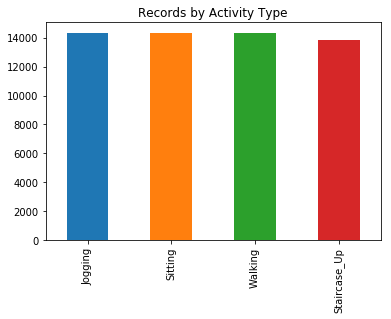

In [4]:
data_frame['Activity'].value_counts().plot(kind='bar', title='Records by Activity Type', figsize=(6, 4),align='center');

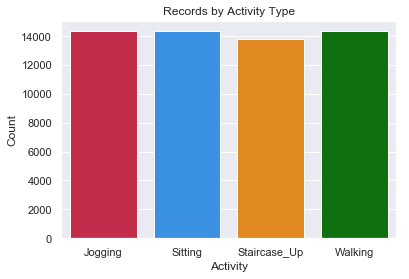

In [20]:
colours = ["crimson", "dodgerblue", "darkorange", "green"]
sns.set(rc={'figure.figsize':(6, 4)})
fig = sns.countplot(x = "Activity" , data = data_frame, palette=colours)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Records by Activity Type")
#plt.grid(True)
plt.show(fig)

In [6]:
def plot_activity(activity, df, i):
    data = df[df['Activity'] == activity][['Ax', 'Ay', 'Az']][:i]
    axis = data.plot(subplots=True, figsize=(10, 6), title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))


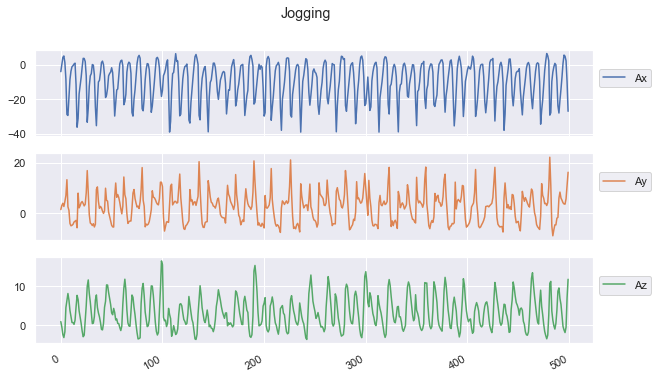

In [7]:
plot_activity("Jogging", data_frame, i=500)

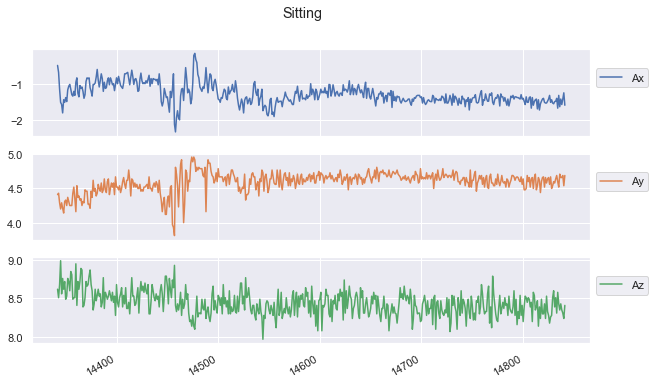

In [8]:
plot_activity("Sitting", data_frame, i=500)

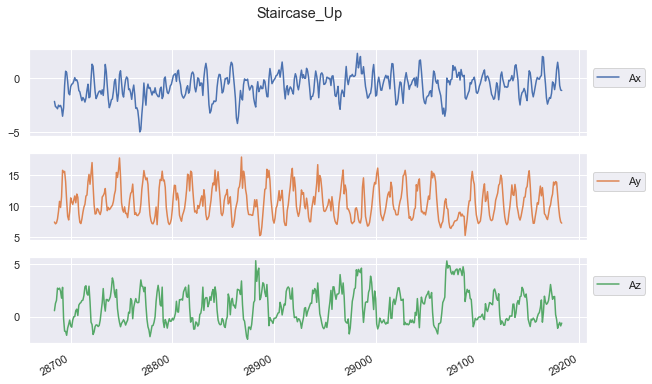

In [9]:
plot_activity("Staircase_Up", data_frame, i=500)

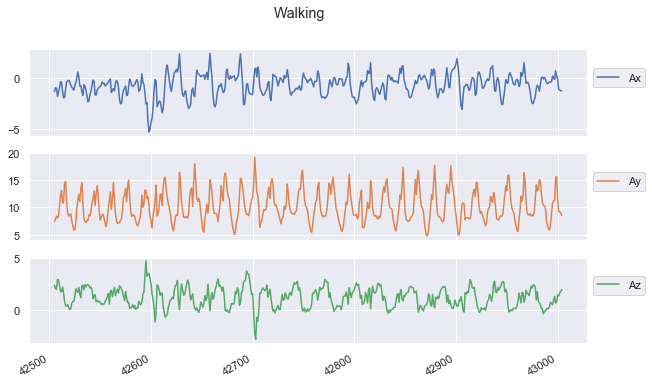

In [10]:
plot_activity("Walking", data_frame, i=500)